<a href="https://colab.research.google.com/github/vinayakbs311/iris_data_classification_KNN_/blob/main/19_KNN_with_dataset_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of KNN on Iris Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML_Practice/KNN/iris.csv')

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data[:2]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [ ]:
data.values # .values convert ur df into array

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

## Data preparation

In [ ]:
X = data.iloc[:,:-1].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y = data.iloc[:,4].values
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

## Split the data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.20)


In [ ]:
# before proceeding will check train n test data accuracy
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier() #default k value is 5
model.fit(X_train,y_train)
print('Train data accuracy:',model.score(X_train,y_train)*100)
print('Test data accuracy:',model.score(X_test,y_test)*100)

Train data accuracy: 95.83333333333334
Test data accuracy: 96.66666666666667


In [ ]:
y_pred= model.predict(X_test)
print('3 Inputs:\n',X_test[:3])
print('\n\n')
print('Predicted 3 outputs:',y_pred[:3])
print('Actual 3 outputs:',y_test[:3])

3 Inputs:
 [[6.  2.9 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.7 3.8 1.7 0.3]]



Predicted 3 outputs: ['versicolor' 'setosa' 'setosa']
Actual 3 outputs: ['versicolor' 'setosa' 'setosa']


In [ ]:
#print('Accuracy is:',model.score(X_train,y_train))#98.33
print('Accuracy is:',model.score(X_test,y_test)*100)

Accuracy is: 96.66666666666667


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))

[[13  0  0]
 [ 0 11  1]
 [ 0  0  5]]


In [ ]:
y_test

array(['versicolor', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'setosa',
       'setosa', 'setosa', 'virginica', 'versicolor', 'setosa'],
      dtype=object)

In [ ]:
y_pred

array(['versicolor', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'setosa',
       'setosa', 'setosa', 'virginica', 'versicolor', 'setosa'],
      dtype=object)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.92      0.96        12
   virginica       0.83      1.00      0.91         5

    accuracy                           0.97        30
   macro avg       0.94      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
print(accuracy_score(y_test,y_pred)*100)

96.66666666666667


# Find out value of K?

In [ ]:
[i for i in range(1,11)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
for k in range(1,11):
    model_new = KNeighborsClassifier(n_neighbors=k,n_jobs = -1)
    model_new.fit(X_train,y_train)
    print('for k=',k,'training data accuracy is:',model_new.score(X_train,y_train)*100)

for k= 1 training data accuracy is: 100.0
for k= 2 training data accuracy is: 97.5
for k= 3 training data accuracy is: 95.0
for k= 4 training data accuracy is: 95.0
for k= 5 training data accuracy is: 95.83333333333334
for k= 6 training data accuracy is: 96.66666666666667
for k= 7 training data accuracy is: 96.66666666666667
for k= 8 training data accuracy is: 97.5
for k= 9 training data accuracy is: 97.5
for k= 10 training data accuracy is: 97.5


In [ ]:
# lets consider f1_score as a measure to findout best k value

In [ ]:
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
f1_list=[]
k_list=[]
for k in range(1,11):
    clf=KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    f=f1_score(y_test,y_pred,average='macro')
    f1_list.append(f)
    k_list.append(k)

In [ ]:
k_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
print(f1_list)

[0.9628482972136223, 0.9249999999999999, 0.9628482972136223, 0.9628482972136223, 0.9628482972136223, 0.9628482972136223, 0.9628482972136223, 0.9249999999999999, 0.9249999999999999, 0.9249999999999999]


In [ ]:
best_f1_score=max(f1_list)
best_k=k_list[f1_list.index(best_f1_score)]        
print("Optimum K value=",best_k," with F1-Score=",best_f1_score)

Optimum K value= 1  with F1-Score= 1.0


Text(0.5, 1.0, 'K neigbours vs f1_score')

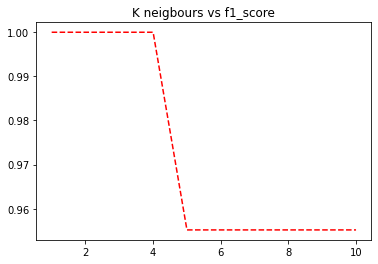

In [ ]:
plt.plot(k_list,f1_list,'r--')
plt.title('K neigbours vs f1_score')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_2 = KNeighborsClassifier(n_neighbors=8)
model_2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
model_2.score(X_train,y_train)*100

97.5

# Check error rate vs K

In [ ]:
error_rate = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
print(error_rate)

[0.0, 0.0, 0.0, 0.0, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333, 0.03333333333333333]


Minimum error:- 0.0 at K = 0


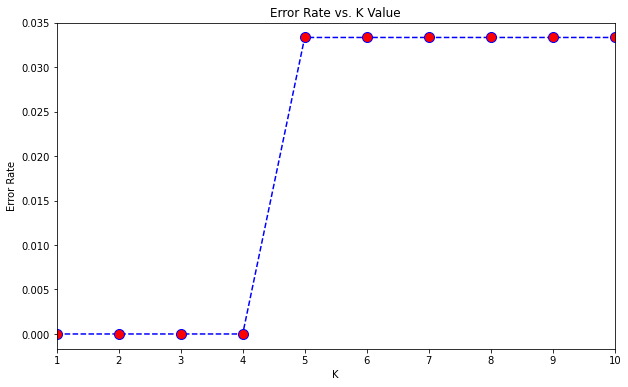

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.xlim((1.,10.))
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

# Find out k using precision

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
p = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    p.append(precision_score(y_test,pred_i,average='macro'))

In [ ]:
print(p)

[1.0, 1.0, 1.0, 1.0, 0.9444444444444445, 0.9444444444444445, 0.9444444444444445, 0.9444444444444445, 0.9444444444444445, 0.9444444444444445, 0.9444444444444445, 0.9444444444444445, 0.9444444444444445, 0.9444444444444445, 0.9444444444444445, 0.9444444444444445, 0.9444444444444445, 0.9444444444444445, 0.9444444444444445, 0.9444444444444445]


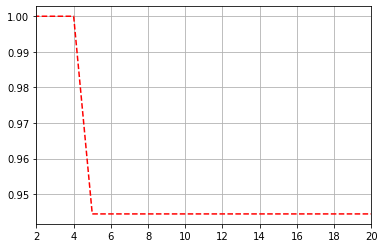

In [ ]:
plt.plot(range(1,21),p,'--r')
plt.xlim((2,20))
plt.grid()

# finding the K value

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
pr_score = []
for i in range(1,16): #k value [1-15]
    model_1 = KNeighborsClassifier(n_neighbors=i,n_jobs=-1) 
    #training
    model_1.fit(X_train,y_train)
    ypred = model_1.predict(X_test)
    p_score = precision_score(y_test,ypred,average='macro') 
    print('Precision for k:',i,'is:',round(p_score*100,2))
    pr_score.append(p_score)

Precision for k: 1 is: 100.0
Precision for k: 2 is: 100.0
Precision for k: 3 is: 100.0
Precision for k: 4 is: 100.0
Precision for k: 5 is: 94.44
Precision for k: 6 is: 94.44
Precision for k: 7 is: 94.44
Precision for k: 8 is: 94.44
Precision for k: 9 is: 94.44
Precision for k: 10 is: 94.44
Precision for k: 11 is: 94.44
Precision for k: 12 is: 94.44
Precision for k: 13 is: 94.44
Precision for k: 14 is: 94.44
Precision for k: 15 is: 94.44


In [ ]:
print(pr_score)

[1.0, 1.0, 1.0, 1.0, 0.9444444444444445, 0.9444444444444445, 0.9444444444444445, 0.9444444444444445, 0.9444444444444445, 0.9444444444444445, 0.9444444444444445, 0.9444444444444445, 0.9444444444444445, 0.9444444444444445, 0.9444444444444445]


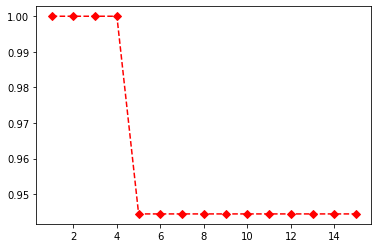

In [ ]:
plt.plot(range(1,16),pr_score,'--Dr')